In [ ]:
!pip install cianparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.1/247.1 kB 10.9 MB/s eta 0:00:00


In [ ]:
import cianparser

data = cianparser.parse(
    deal_type="rent_long",
    accommodation_type="flat",
    location="Москва",
    rooms=(1, 2, 3, 4),
    start_page=55,
    end_page=100,
    is_saving_csv=True,
)




                              Preparing to collect information from pages..
The absolute path to the file: 
/content/cian_parsing_result_rent_long_55_100_moskva_14_Nov_2023_20_12_13_410483.csv 

The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=55&region=1&offer_type=flat&deal_type=rent&room1=1&room2=1&room3=1&room4=1&with_neighbors=0&type=4
55 page: there is CAPTCHA... failed to parse page...


The collection of information from the pages with list of announcements is completed
Total number of parsed announcements: 0. Average price per month: 0 rub



In [ ]:
print(data)

[]


In [ ]:
print(data[0])

IndexError: ignored

In [ ]:
len(data)


In [ ]:
counter = 0

for i in range(len(data)):
  if data[i]['deal_type'] == 'rent':
    counter += 1

print(counter)

In [ ]:
data[0].keys()

IndexError: ignored

In [ ]:
import pandas as pd

list_flats = []

for i in range(len(data)):
  tmp_flat = []
  for j in data[i].values():
    tmp_flat.append(j)
  list_flats.append(tmp_flat)
list_flats

In [ ]:
df = pd.DataFrame(list_flats,columns = data[0].keys())

IndexError: ignored

In [ ]:
df

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price_per_month,commissions,district,street,house_number,underground
0,KOVCHEG,real_estate_agent,https://www.cian.ru/rent/flat/294715265/,Москва,rent,flat,9,17,1,42.0,1309,55000,0,Черемушки,Наметкина,13к1,Новые Черёмушки
1,ID 438029,realtor,https://www.cian.ru/rent/flat/294909620/,Москва,rent,flat,18,27,1,42.0,1785,75000,0,Ломоносовский,Панферова,4,Университет
2,ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/294738678/,Москва,rent,flat,5,10,1,22.6,1716,38800,0,,Александры Монаховой,94к2,Бунинская аллея
3,ID 18835544,official_representative,https://www.cian.ru/rent/flat/278216280/,Москва,rent,flat,7,12,2,90.0,6666,600000,0,Тверской,Охотный Ряд,2,Охотный ряд
4,Apple Real Estate,real_estate_agent,https://www.cian.ru/rent/flat/293989512/,Москва,rent,flat,4,8,4,223.0,3363,750000,0,Хамовники,1-й Зачатьевский переулок,5,Парк Культуры
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,Сергей Зилотов,realtor,https://www.cian.ru/rent/flat/194847013/,Москва,rent,flat,16,22,2,60.0,916,55000,0,Бескудниковский,Дмитровское шоссе,64К4,Верхние Лихоборы
1503,Левченко-реалти,real_estate_agent,https://www.cian.ru/rent/flat/294960447/,Москва,rent,flat,3,5,2,44.0,1454,64000,0,Донской,Загородное шоссе,10К10,Крымская
1504,МИЭЛЬ,real_estate_agent,https://www.cian.ru/rent/flat/294820705/,Москва,rent,flat,4,5,2,45.0,1266,57000,0,Останкинский,Цандера,10,ВДНХ
1505,Александр Гойда,realtor,https://www.cian.ru/rent/flat/294940857/,Москва,rent,flat,10,24,2,52.0,1250,65000,0,Отрадное,Римского-Корсакова,11к3,Отрадное


In [ ]:
from pathlib import Path
filepath = Path('flats_Saintpy.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

Теперь стоим модель

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd

Moscow = pd.read_csv('flats_Moscow.csv')
Kazan = pd.read_csv('flats_Kazan.csv')
Novosib = pd.read_csv('flats_Novosib.csv')
SaintP = pd.read_csv('flats_SaintP.csv')
Ekat = pd.read_csv('flats_Ekat.csv')

In [ ]:
Moscow

,Unnamed: 0,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price_per_month,commissions,district,street,house_number,underground
0,0,KOVCHEG,real_estate_agent,https://www.cian.ru/rent/flat/294715265/,Москва,rent,flat,9,17,1,42.0,1309,55000,0,Черемушки,Наметкина,13к1,Новые Черёмушки
1,1,ID 438029,realtor,https://www.cian.ru/rent/flat/294909620/,Москва,rent,flat,18,27,1,42.0,1785,75000,0,Ломоносовский,Панферова,4,Университет
2,2,ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/294738678/,Москва,rent,flat,5,10,1,22.6,1716,38800,0,NaN,Александры Монаховой,94к2,Бунинская аллея
3,3,ID 18835544,official_representative,https://www.cian.ru/rent/flat/278216280/,Москва,rent,flat,7,12,2,90.0,6666,600000,0,Тверской,Охотный Ряд,2,Охотный ряд
4,4,Apple Real Estate,real_estate_agent,https://www.cian.ru/rent/flat/293989512/,Москва,rent,flat,4,8,4,223.0,3363,750000,0,Хамовники,1-й Зачатьевский переулок,5,Парк Культуры
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,1502,Сергей Зилотов,realtor,https://www.cian.ru/rent/flat/194847013/,Москва,rent,flat,16,22,2,60.0,916,55000,0,Бескудниковский,Дмитровское шоссе,64К4,Верхние Лихоборы
1503,1503,Левченко-реалти,real_estate_agent,https://www.cian.ru/rent/flat/294960447/,Москва,rent,flat,3,5,2,44.0,1454,64000,0,Донской,Загородное шоссе,10К10,Крымская
1504,1504,МИЭЛЬ,real_estate_agent,https://www.cian.ru/rent/flat/294820705/,Москва,rent,flat,4,5,2,45.0,1266,57000,0,Останкинский,Цандера,10,ВДНХ
1505,1505,Александр Гойда,realtor,https://www.cian.ru/rent/flat/294940857/,Москва,rent,flat,10,24,2,52.0,1250,65000,0,Отрадное,Римского-Корсакова,11к3,Отрадное


In [ ]:



flats = pd.concat([Moscow,Kazan,Novosib,SaintP,Ekat])

In [ ]:
flats

,Unnamed: 0,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price_per_month,commissions,district,street,house_number,underground
0,0,KOVCHEG,real_estate_agent,https://www.cian.ru/rent/flat/294715265/,Москва,rent,flat,9,17,1,42.0,1309,55000,0,Черемушки,Наметкина,13к1,Новые Черёмушки
1,1,ID 438029,realtor,https://www.cian.ru/rent/flat/294909620/,Москва,rent,flat,18,27,1,42.0,1785,75000,0,Ломоносовский,Панферова,4,Университет
2,2,ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/294738678/,Москва,rent,flat,5,10,1,22.6,1716,38800,0,NaN,Александры Монаховой,94к2,Бунинская аллея
3,3,ID 18835544,official_representative,https://www.cian.ru/rent/flat/278216280/,Москва,rent,flat,7,12,2,90.0,6666,600000,0,Тверской,Охотный Ряд,2,Охотный ряд
4,4,Apple Real Estate,real_estate_agent,https://www.cian.ru/rent/flat/293989512/,Москва,rent,flat,4,8,4,223.0,3363,750000,0,Хамовники,1-й Зачатьевский переулок,5,Парк Культуры
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,386,ID 86319814,homeowner,https://ekb.cian.ru/rent/flat/295069300/,Екатеринбург,rent,flat,10,12,3,65.0,615,40000,0,Кировский,Новгородцевой,5/1,NaN
387,387,Высота,real_estate_agent,https://ekb.cian.ru/rent/flat/294512032/,Екатеринбург,rent,flat,3,24,3,90.0,444,40000,0,Кировский,Студенческая,80,Площадь 1905 года
388,388,ID 109885690,homeowner,https://ekb.cian.ru/rent/flat/294996012/,Екатеринбург,rent,flat,13,32,2,63.0,714,45000,0,Чкаловский,Светлый мкр,5,Ботаническая
389,389,ID 51315956,homeowner,https://ekb.cian.ru/rent/flat/295018030/,Екатеринбург,rent,flat,9,9,3,79.0,506,40000,0,Чкаловский,Шишимская,19,Ботаническая


In [ ]:
flats.drop(['author', 'author_type', 'link', 'deal_type','accommodation_type','street', 'price_per_m2', 'district', 'commissions','house_number'], axis = 1, inplace = True)

In [ ]:
X = flats.drop('price_per_month', axis = 1)
y = flats['price_per_month']

In [ ]:
X

,Unnamed: 0,city,floor,floors_count,rooms_count,total_meters,underground
0,0,Москва,9,17,1,42.0,Новые Черёмушки
1,1,Москва,18,27,1,42.0,Университет
2,2,Москва,5,10,1,22.6,Бунинская аллея
3,3,Москва,7,12,2,90.0,Охотный ряд
4,4,Москва,4,8,4,223.0,Парк Культуры
...,...,...,...,...,...,...,...
386,386,Екатеринбург,10,12,3,65.0,NaN
387,387,Екатеринбург,3,24,3,90.0,Площадь 1905 года
388,388,Екатеринбург,13,32,2,63.0,Ботаническая
389,389,Екатеринбург,9,9,3,79.0,Ботаническая


In [ ]:
y

0       55000
1       75000
2       38800
3      600000
4      750000
        ...  
386     40000
387     40000
388     45000
389     40000
390     30000
Name: price_per_month, Length: 4797, dtype: int64

In [ ]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor


pipeline = Pipeline([('encoder', ce.cat_boost.CatBoostEncoder()), ('catboost',CatBoostRegressor(
                          iterations=10000,
                          learning_rate=0.7,
                          depth=3))
                    ])


In [ ]:
cbe_encoder = ce.cat_boost.CatBoostEncoder()

cbe_encoder.fit(X, y)
train_cbe = cbe_encoder.transform(X)

In [ ]:
test = pd.DataFrame([[0,"Москва", 55, 55, 2,32,"Деловой центр"]], columns = ["Unnamed: 0","city","floor","floors_count","rooms_count",	"total_meters","underground"])

In [ ]:
res = cbe_encoder.transform(test)

In [ ]:
res

,Unnamed: 0,city,floor,floors_count,rooms_count,total_meters,underground
0,0,198779.810505,55,55,2,32,403903.04015


In [ ]:
train_cbe

,Unnamed: 0,city,floor,floors_count,rooms_count,total_meters,underground
0,0,198779.810505,52,75,2,107.0,403903.040150
1,1,198779.810505,56,75,2,94.0,403903.040150
2,2,198779.810505,46,75,2,88.6,403903.040150
3,3,198779.810505,46,75,2,88.0,403903.040150
4,4,198779.810505,13,78,2,62.0,301434.059539
...,...,...,...,...,...,...,...
1499,1499,198779.810505,6,9,2,45.0,71296.635084
1500,1500,198779.810505,8,12,2,51.9,79629.968418
1501,1501,198779.810505,10,16,2,61.0,63222.476313
1502,1502,198779.810505,1,9,2,45.0,63529.978945


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.2)

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=100000,
                          learning_rate=0.7,
                          depth=3)

In [ ]:
X_train

,Unnamed: 0,city,floor,floors_count,rooms_count,total_meters,underground
1114,1114,Москва,9,34,1,42.0,Владыкино
345,345,Новосибирск,5,17,2,56.0,NaN
1030,1030,Москва,5,11,4,173.0,Чеховская
230,230,Казань,8,18,2,64.0,NaN
61,61,Казань,2,6,3,138.0,Площадь Тукая
...,...,...,...,...,...,...,...
1022,1022,Москва,3,5,4,155.0,Тверская
420,420,Санкт-Петербург,4,5,3,115.6,Адмиралтейская
62,62,Москва,13,17,1,22.0,Некрасовка
245,245,Екатеринбург,10,20,2,51.0,Площадь 1905 года


In [ ]:
pipeline.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
5000:	learn: 3223.1702056	total: 5.36s	remaining: 5.36s
5001:	learn: 3223.0738227	total: 5.36s	remaining: 5.36s
5002:	learn: 3222.3373753	total: 5.36s	remaining: 5.36s
5003:	learn: 3222.1815959	total: 5.36s	remaining: 5.35s
5004:	learn: 3219.9769421	total: 5.36s	remaining: 5.35s
5005:	learn: 3219.9568586	total: 5.37s	remaining: 5.35s
5006:	learn: 3219.9049676	total: 5.37s	remaining: 5.35s
5007:	learn: 3219.1033875	total: 5.37s	remaining: 5.35s
5008:	learn: 3218.7964017	total: 5.37s	remaining: 5.35s
5009:	learn: 3217.2939701	total: 5.37s	remaining: 5.35s
5010:	learn: 3216.9216026	total: 5.37s	remaining: 5.35s
5011:	learn: 3216.8849592	total: 5.37s	remaining: 5.34s
5012:	learn: 3216.3080532	total: 5.37s	remaining: 5.34s
5013:	learn: 3216.1275616	total: 5.37s	remaining: 5.34s
5014:	learn: 3215.7869691	total: 5.37s	remaining: 5.34s
5015:	learn: 3215.3553568	total: 5.38s	remaining: 5.34s
5016:	learn: 3214.5199415	total: 5.3

Pipeline(steps=[('encoder', CatBoostEncoder(cols=['city', 'underground'])),
                ('catboost',
                 <catboost.core.CatBoostRegressor object at 0x7e35fbe2a200>)])

In [ ]:
y_predict = pipeline.predict(X_test)

In [ ]:
y_predict

array([ 1.53155576e+04,  7.26931046e+04,  3.10298829e+04,  7.52164543e+04,
        2.12171351e+04,  6.10897210e+05,  1.71884397e+04,  1.27031295e+06,
        8.07444707e+04,  6.10511470e+04,  2.07698153e+04,  2.53999774e+05,
        2.39982862e+04,  5.53886463e+04,  8.16165707e+04,  5.32779528e+04,
       -1.22213770e+04,  2.96031692e+04,  4.10281918e+04,  5.26825557e+04,
       -5.54398463e+03,  4.28386836e+04,  2.76268450e+03,  1.41009759e+05,
        3.68112228e+04,  6.23579641e+03,  2.06750216e+04,  2.62646303e+04,
        7.20902235e+04,  4.59491209e+04,  6.15906647e+04,  1.68683391e+05,
        2.38765604e+04,  4.02269522e+05,  2.74757792e+04,  1.55683246e+05,
        9.86375981e+04,  5.82798970e+04,  5.33893395e+04,  6.05787515e+04,
        1.10959541e+05,  8.05181398e+04,  1.39958485e+04,  7.12299669e+04,
        6.74753686e+04,  2.57216734e+05,  2.51615540e+04,  5.13464728e+04,
        5.79641233e+04,  7.78711601e+05,  2.75685388e+04,  3.34109766e+05,
        5.78956095e+04,  

In [ ]:
#MSE = (y - y_predict)^2 / k
import numpy as np
MSE = np.power((y_test - y_predict),2) / len(y_test)

In [ ]:
MAE = np.sum(np.abs(y_test - y_predict)) / len(y_test)

In [ ]:
MAE

32374.373478242684

In [ ]:
y_test

1130     75000
255      19000
686     200000
106      28000
935      99000
         ...  
1167     82000
316      27000
593      20000
406      25000
558      36000
Name: price_per_month, Length: 960, dtype: int64

In [ ]:
y_predict[1]

8896.35541824963

In [ ]:
viz = pd.DataFrame(y_test)
viz2 = pd.DataFrame(y_predict)

(array([4.092e+03, 5.020e+02, 1.010e+02, 4.300e+01, 3.500e+01, 9.000e+00,
        6.000e+00, 4.000e+00, 2.000e+00, 3.000e+00]),
 array([  10000.,  209000.,  408000.,  607000.,  806000., 1005000.,
        1204000., 1403000., 1602000., 1801000., 2000000.]),
 <BarContainer object of 10 artists>)

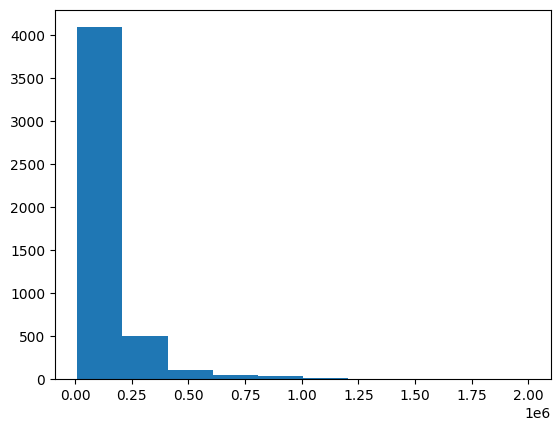

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y)

In [ ]:
model.save_model('modelfinfinfin', format="cbm")



CatBoostError: ignored

In [ ]:
model.load_model('modelfin')

In [ ]:
import joblib

In [ ]:
joblib.dump(pipeline, 'modelpipelinefinal.pickle')

['modelpipelinefinal.pickle']

In [ ]:
loaded_model = joblib.load('modelpipelinefinal.pickle')


In [ ]:
test = pd.DataFrame([[0,"Москва", 55, 55, 2,32,"Деловой центр"]], columns = ["Unnamed: 0","city","floor","floors_count","rooms_count",	"total_meters","underground"])

In [ ]:
loaded_model.predict(test)

array([243013.84781752])

In [ ]:
pd.__version__

'1.5.3'